<h1 align="center" style="font-size: 35px;"><font color="C1772D"><strong>Aplicación del Control Óptimo en el Campo de la Robótica</strong></font></h1>

<h2 align="center"><font color="#667388"><strong>Luis F. Recalde</strong><br>Ambato-Ecuador</font></h2>


<h3 align="center"><font color="#667388"><strong>Universidad Indoamerica</strong></font></h3>

<h3 style="font-size: 30px; color: #C1772D; font-weight: bold; text-align: left;">Casadi</h3>


<h3 align="left" style="font-size: 20px; color: #667388;"><strong>Programacion Cuadratica</strong></h3>


<span style="font-size:1.4em;">
\begin{equation}
    \begin{split}
   \min_{\small \mathbf{x}}  \quad  \mathbf{x}^{T} \mathbf{Q} \mathbf{x} + \mathbf{g}^{T}\mathbf{x}\\
    \textrm{subject to: } \\
    \mathbf{x}_{lb} \leq \mathbf{x} \leq \mathbf{x}_{ub}
    \\
    \mathbf{a}_{lb} \leq \mathbf{A}\mathbf{x} \leq \mathbf{a}_{ub}
    \end{split}
    \end{equation}
</span>

<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Code:</b> 
</div>

In [1]:
import casadi as ca
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from casadi import jacobian
from casadi import gradient
from casadi import Function
from casadi import vertcat

<div style="text-align: justify; font-size: 20px;"> Crear el problema. </div>

In [2]:

H = ca.DM([[2, 0], [0, 2]])  # Q Matrix
g = ca.DM([0, 0])           # Linear Term
A = ca.DM([[1, -1]])         # Constraint matrix
lba = ca.DM([-1.5])            # Lower bound for constraint
uba = ca.DM([-1.5])            # Upper bound for constraint
lbx = ca.DM([-4, 0])       # Lower bounds for x
ubx = ca.DM([-1, 4])         # Upper bounds for x

# Define the QP problem
qp = {'h': H.sparsity(), 'a': A.sparsity()}
S = ca.conic('S', 'qpoases', qp)

# Solve the QP
res = S(h=H, g=g, a=A, lba=lba, uba=uba,  lbx=lbx, ubx=ubx)
x_opt = res['x']

print("Optimal x:", x_opt)



####################   qpOASES  --  QP NO.   1   #####################

    Iter   |    StepLength    |       Info       |   nFX   |   nAC    
 ----------+------------------+------------------+---------+--------- 
       0   |   1.011236e-01   |   REM BND    0   |     1   |     0   
       1   |   3.702830e-01   |   ADD CON    0   |     1   |     1   
       2   |   1.587302e-01   |   REM BND    1   |     0   |     1   
       3   |   4.000000e-01   |   ADD BND    0   |     1   |     1   
       4   |   1.000000e+00   |    QP SOLVED     |     1   |     1   
Optimal x: [-1, 0.5]


In [3]:
def f_casadi_res_quadratic():
    # Cost function to minimize 
    # INPUTS
    # x                                                - optimization variables
    # OUTPUT
    # r                                                - cost values
    # dfdx                                             - partial derivative respect to x
    x =  ca.MX.sym('x', 2, 1)
    Q = ca.diag([2, 2])
    xd = ca.MX([0.0, 0.0])
    xe = x-xd
    lambda_ = ca.MX.sym('lambda_', 1, 1)
    # Cost function
    f_sym = xe.T@Q@xe
    f = Function('f',[x], [f_sym])

    # Jacobian of the cost
    df_dx_sym = gradient(f_sym, x)
    df_dx = Function('df_dx', [x], [df_dx_sym])

    # hessian of the cost
    d2f_d2x_sym = jacobian(df_dx_sym, x)
    d2f_d2x = Function('d2d_d2x', [x], [d2f_d2x_sym])

    ## Constraints of the problem
    c_sym = x[0, 0] - x[1, 0]  +1.5
    c = Function('c',[x], [c_sym])

    grad_x_c_sym = gradient(c_sym, x)
    grad_x_c = Function('grad_x_c', [x], [grad_x_c_sym])

    dx_grad_x_c_sym = jacobian(grad_x_c_sym@lambda_, x)
    dx_grad_x_c = Function('dx_grad_x_c', [x, lambda_], [dx_grad_x_c_sym])
    
    return f, df_dx, d2f_d2x, c, grad_x_c, dx_grad_x_c

In [4]:
# Init Values
x  = np.array([0.1, 0])

# Generate functions
f, df_dx, d2f_d2x, c, grad_x_c, dx_grad_x_c = f_casadi_res_quadratic()

# Call functions
r =  f(x)
df = df_dx(x)
H = d2f_d2x(x)
const = c(x)
grad_c = grad_x_c(x)
dx_grad_c = dx_grad_x_c(x, 0)

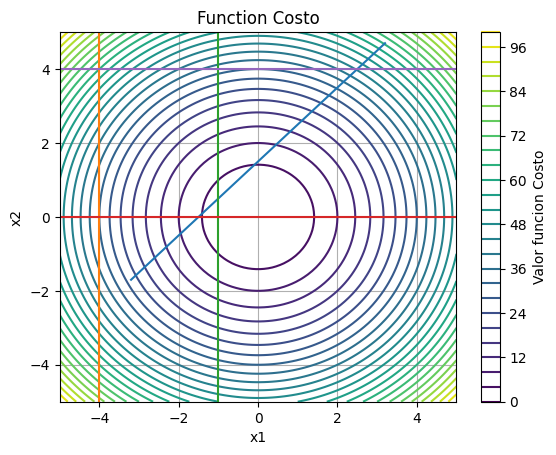

In [5]:
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
xlist_rest = np.linspace(-3.2, 3.2, 100)

# Restricciones
x_res_1 = -4*np.ones((xlist.shape[0], ))
y_res_1 = np.linspace(-5.0, 5.0, 100)

x_res_2 = -1*np.ones((xlist.shape[0], ))
y_res_2 = np.linspace(-5.0, 5.0, 100)

x_res_3 = np.linspace(-5.0, 5.0, 100)
y_res_3 = 0*np.ones((xlist.shape[0], ))

x_res_4 =  np.linspace(-5.0, 5.0, 100)
y_res_4 = 4*np.ones((xlist.shape[0], ))

X, Y = np.meshgrid(xlist, ylist)
Z = np.array([[f(np.array([x_val, y_val])) for x_val, y_val in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
Z = Z.reshape((Z.shape[0], Z.shape[1]))
plt.contour(X, Y, Z, levels=30) 
plt.plot(xlist_rest, xlist_rest+1.5, '-')
plt.plot(x_res_1, y_res_1, '-')
plt.plot(x_res_2, y_res_2, '-')
plt.plot(x_res_3, y_res_3, '-')
plt.plot(x_res_4, y_res_4, '-')



plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Function Costo')
plt.colorbar(label='Valor funcion Costo')
plt.grid(True)
plt.show()

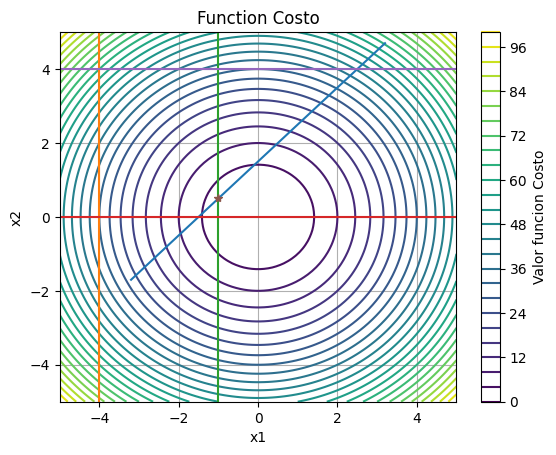

In [6]:
x_opt = res['x']
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
xlist_rest = np.linspace(-3.2, 3.2, 100)

# Restricciones
x_res_1 = -4*np.ones((xlist.shape[0], ))
y_res_1 = np.linspace(-5.0, 5.0, 100)

x_res_2 = -1*np.ones((xlist.shape[0], ))
y_res_2 = np.linspace(-5.0, 5.0, 100)

x_res_3 = np.linspace(-5.0, 5.0, 100)
y_res_3 = 0*np.ones((xlist.shape[0], ))

x_res_4 =  np.linspace(-5.0, 5.0, 100)
y_res_4 = 4*np.ones((xlist.shape[0], ))

X, Y = np.meshgrid(xlist, ylist)
Z = np.array([[f(np.array([x_val, y_val])) for x_val, y_val in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
Z = Z.reshape((Z.shape[0], Z.shape[1]))
plt.contour(X, Y, Z, levels=30) 
plt.plot(xlist_rest, xlist_rest+1.5, '-')
plt.plot(x_res_1, y_res_1, '-')
plt.plot(x_res_2, y_res_2, '-')
plt.plot(x_res_3, y_res_3, '-')
plt.plot(x_res_4, y_res_4, '-')

plt.plot(x_opt[0],x_opt[1], '*')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Function Costo')
plt.colorbar(label='Valor funcion Costo')
plt.grid(True)
plt.show()